## Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import random


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
!pip install nlpaug
import nlpaug.augmenter.word as naw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 4.9 MB/s eta 0:00:00


## Uploading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cp /content/drive/'My Drive'/COSC2779/Assignment2/StanceDataset.zip .
!unzip -q -o StanceDataset.zip
!rm StanceDataset.zip

In [6]:
Test_df = pd.read_csv('/content/StanceDataset/test.csv',encoding='latin1', lineterminator='\r')

In [7]:
Stance_df = pd.read_csv('/content/StanceDataset/train.csv',encoding='latin1', lineterminator='\r')

## Data Exploration

In [8]:
Stance_df['Target'].value_counts()

Hillary Clinton                     689
Feminist Movement                   664
Legalization of Abortion            653
Atheism                             513
Climate Change is a Real Concern    395
Name: Target, dtype: int64

In [10]:
Stance_df['Stance'].value_counts()

AGAINST    1395
NONE        766
FAVOR       753
Name: Stance, dtype: int64

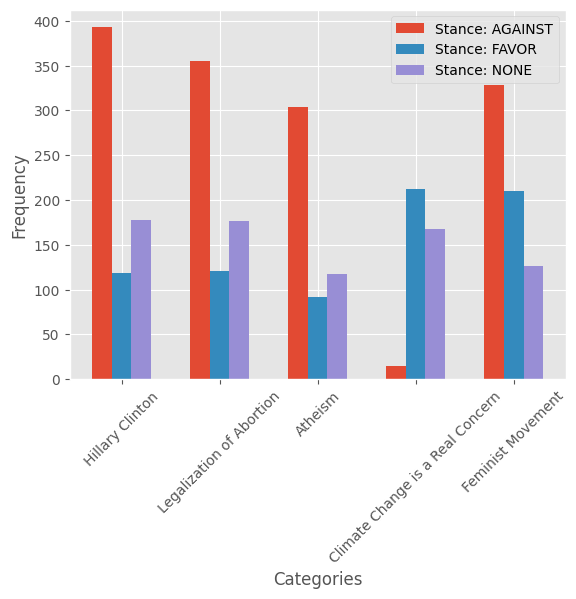

In [13]:
import matplotlib.pyplot as plt
import numpy as np

stances = Stance_df['Stance'].unique()
targets = Stance_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = Stance_df[Stance_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()


There seems to be bias present in the data

In [14]:
Test_df['Target'].value_counts()

Donald Trump                        707
Hillary Clinton                     295
Feminist Movement                   285
Legalization of Abortion            280
Atheism                             220
Climate Change is a Real Concern    169
Name: Target, dtype: int64

Removing Donald Trump as target value as it is not present in the training dataset

In [15]:
Test_df = Test_df[Test_df['Target'] != 'Donald Trump']

In [16]:
Test_df['Target'].value_counts()

Hillary Clinton                     295
Feminist Movement                   285
Legalization of Abortion            280
Atheism                             220
Climate Change is a Real Concern    169
Name: Target, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Atheism'),
  Text(1, 0, 'Climate Change is a Real Concern'),
  Text(2, 0, 'Feminist Movement'),
  Text(3, 0, 'Hillary Clinton'),
  Text(4, 0, 'Legalization of Abortion')])

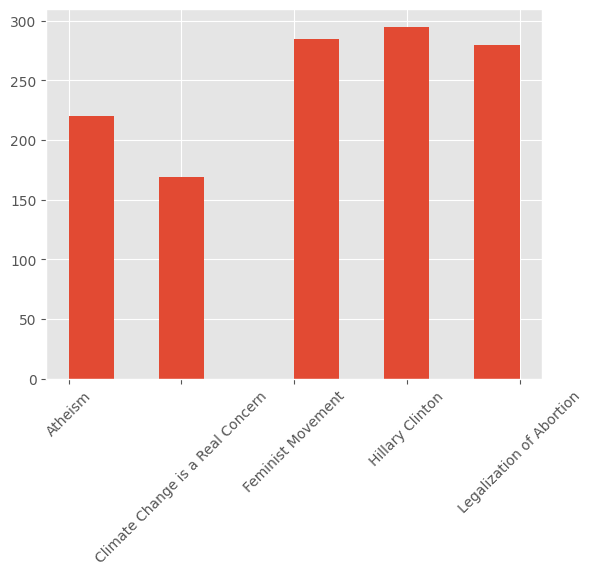

In [17]:
Test_df['Target'].hist()
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'AGAINST'), Text(1, 0, 'FAVOR'), Text(2, 0, 'NONE')])

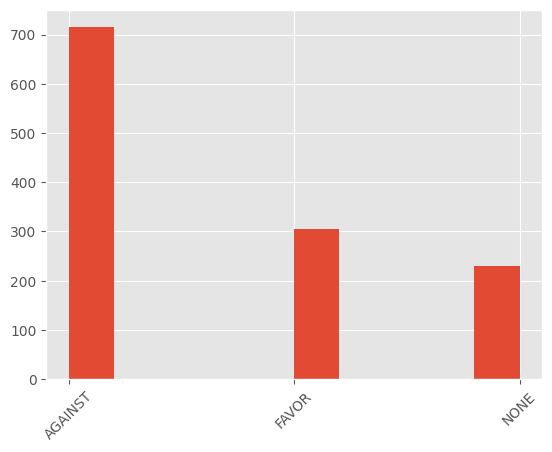

In [18]:
Test_df['Stance'].hist()
plt.xticks(rotation=45)

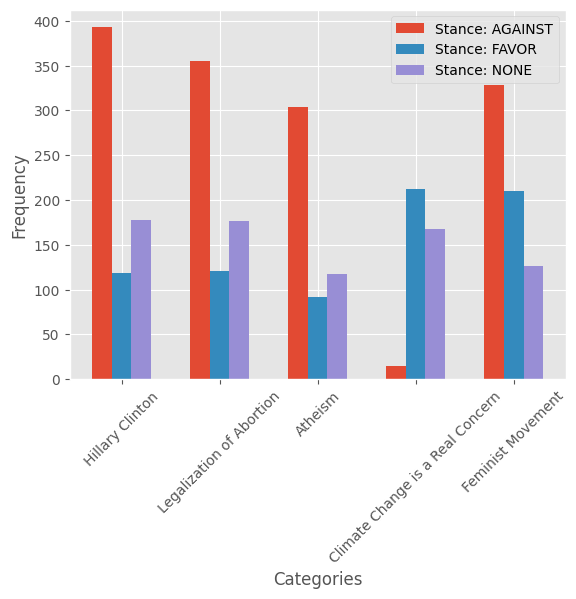

In [19]:
import matplotlib.pyplot as plt
import numpy as np

stances = Stance_df['Stance'].unique()
targets = Stance_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = Stance_df[Stance_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Data is highly unbalanced

## Splitting the data
Data was stratified while splitting to ensure that equal proportion of representation of each target is present in both data sets

In [20]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(Stance_df, test_size=0.2, stratify=Stance_df['Target'], random_state=40)




([0, 1, 2, 3, 4],
 [Text(0, 0, 'Atheism'),
  Text(1, 0, 'Feminist Movement'),
  Text(2, 0, 'Hillary Clinton'),
  Text(3, 0, 'Climate Change is a Real Concern'),
  Text(4, 0, 'Legalization of Abortion')])

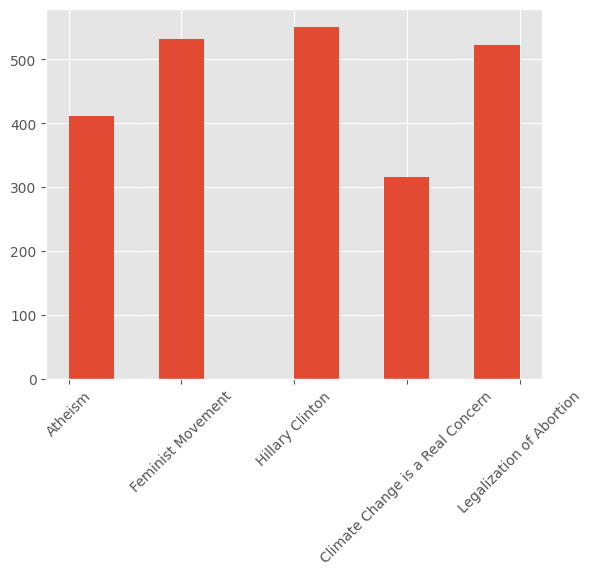

In [22]:
train_df['Target'].hist()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Atheism'),
  Text(1, 0, 'Feminist Movement'),
  Text(2, 0, 'Climate Change is a Real Concern'),
  Text(3, 0, 'Hillary Clinton'),
  Text(4, 0, 'Legalization of Abortion')])

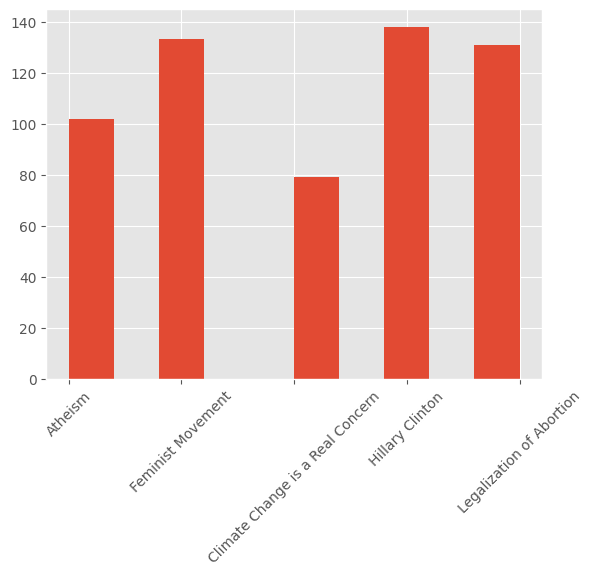

In [23]:
valid_df['Target'].hist()
plt.xticks(rotation=45)

Data is split in training and validation steps ensuring that there is similar percentage representation of target variables in both sets using stratification

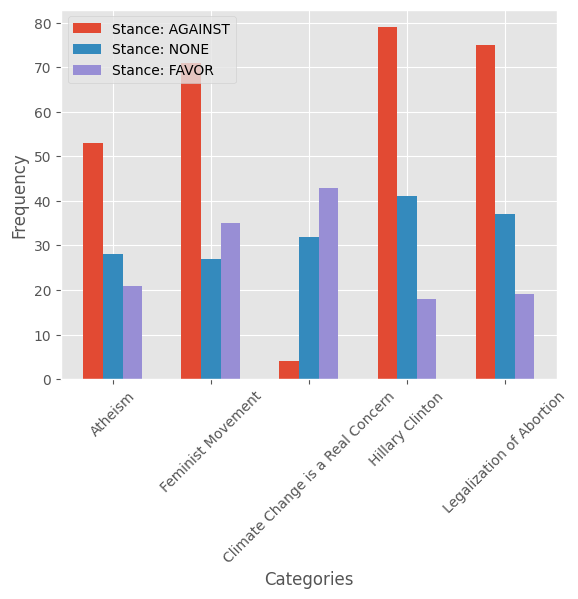

In [24]:
import matplotlib.pyplot as plt
import numpy as np

stances = valid_df['Stance'].unique()
targets = valid_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = valid_df[valid_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

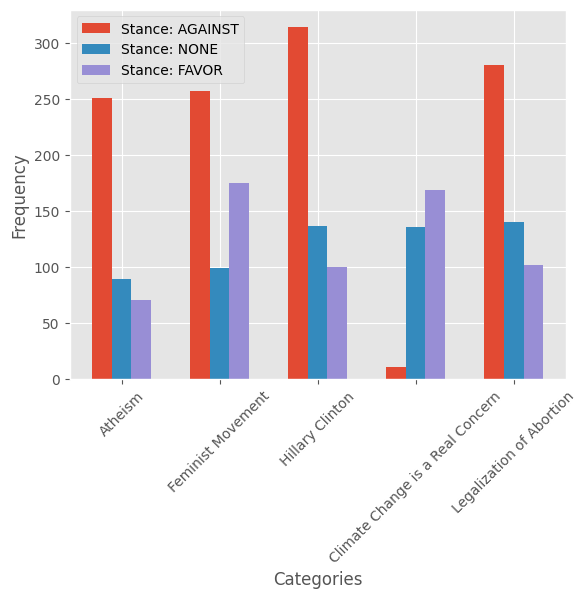

In [25]:
import matplotlib.pyplot as plt
import numpy as np

stances = train_df['Stance'].unique()
targets = train_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = train_df[train_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

The data is highly unbalanced in terms of stance representation for each class this may lead to bias present in the data

## Data Augmentation plus oversampling dataset
Using Augmented data to be populate the under represented/mionority classes

* Synonym Replacement[1]

In [27]:
def get_synonyms(word):
    syn = naw.SynonymAug(aug_p=0.3)
    sentence = word
    modified_sentence = syn.augment(sentence, n=1)
    return str(modified_sentence)

In [28]:
len(train_df['Tweet'])

2331

* Sentence back translation[2]

In [29]:
pip install BackTranslation

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=9eac5a33b27bd3180d35556897938714a6791bfe5cf46275c142fd6807d6e789
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [30]:
from googletrans import Translator, LANGUAGES

In [31]:
def get_translate(word):
    tra = Translator()
    source_language = 'en'
    translated_sentence = tra.translate(word, src=source_language, dest='fr')
    if translated_sentence is not None:
        back_translated_sentence = tra.translate(translated_sentence.text, src='fr', dest=source_language)
        return back_translated_sentence.text if back_translated_sentence is not None else word
    else:
        return word



### Target = Hilary Clinton

In [32]:
temp_df=train_df[train_df['Target']=='Hillary Clinton']

In [33]:
temp_df

,Tweet,Target,Stance,Opinion Towards,Sentiment
1859,As late as 2013 #HillaryClinton opposed marria...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2031,"Dick Morris: @HillaryClinton is ""fundamentally...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2089,"Hillary claims to be a ""champion"" of the middl...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
2083,The kind of Gov that Liberals promise you can ...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
2092,@LeahR77 @DrMartyFox > With continued #Obama's...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
...,...,...,...,...,...
2090,It is offensive when the mexican flag flies on...,Hillary Clinton,AGAINST,2. The tweet does NOT expresses opinion about ...,neg
1924,"A Black President,Healthcare 4 all, Marriage E...",Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
1847,Saw a bit of @HillaryClinton 's speech & I was...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
41,@NBCNews Stop promoting @HillaryClinton. She i...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg


In [34]:
temp_df["Stance"].value_counts()


AGAINST    314
NONE       137
FAVOR      100
Name: Stance, dtype: int64

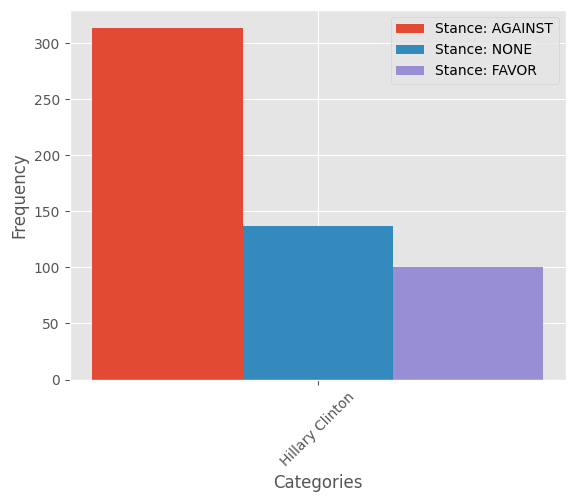

In [35]:
import matplotlib.pyplot as plt
import numpy as np

stances = temp_df['Stance'].unique()
targets = temp_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = temp_df[temp_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Stance: None and favor are under represented compared to against for Hilary Clinton

In [36]:
def find_minority_class(df, column_name):
    value_counts = df[column_name].value_counts()
    print(value_counts)
    minority_class = value_counts.idxmin()
    return minority_class


In [37]:
temp_df["Stance"].value_counts()

AGAINST    314
NONE       137
FAVOR      100
Name: Stance, dtype: int64

In [38]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "FAVOR" or row["Stance"] == "NONE":
        augmented_text = get_synonyms(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [39]:
augmented_df = pd.DataFrame(augmented_data)

In [40]:
null_counts = augmented_df.isnull().sum()

print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [41]:
combinedh_df = pd.concat([temp_df, augmented_df], ignore_index=True)

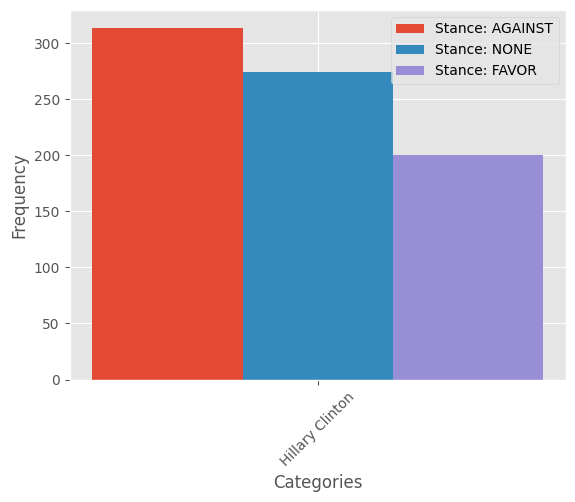

In [42]:
import matplotlib.pyplot as plt
import numpy as np

stances = combinedh_df['Stance'].unique()
targets = combinedh_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedh_df[combinedh_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Favor is still less represented in the data set adding more augmentation of back translation to this data

In [43]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "FAVOR":
        augmented_text = get_translate(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)


In [44]:
augmented_df = pd.DataFrame(augmented_data)


In [45]:

null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [46]:
combinedhc_df = pd.concat([combinedh_df, augmented_df], ignore_index=True)

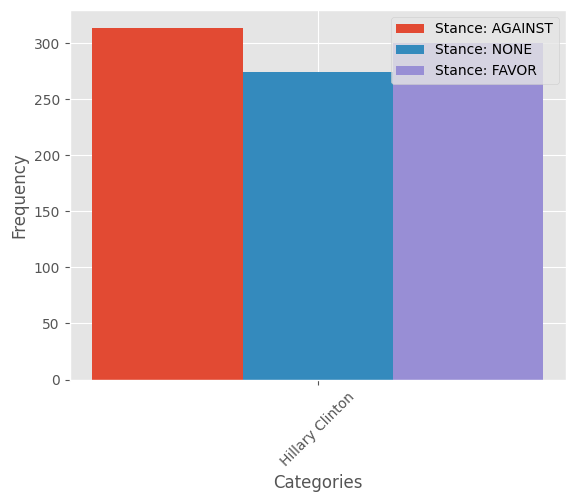

In [47]:
import matplotlib.pyplot as plt
import numpy as np

stances = combinedhc_df['Stance'].unique()
targets = combinedhc_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedhc_df[combinedhc_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Data for the target Hilary clinton is much more representative now in the dataset

### Target = Atheism

In [48]:
temp_df=train_df[train_df['Target']=='Atheism']

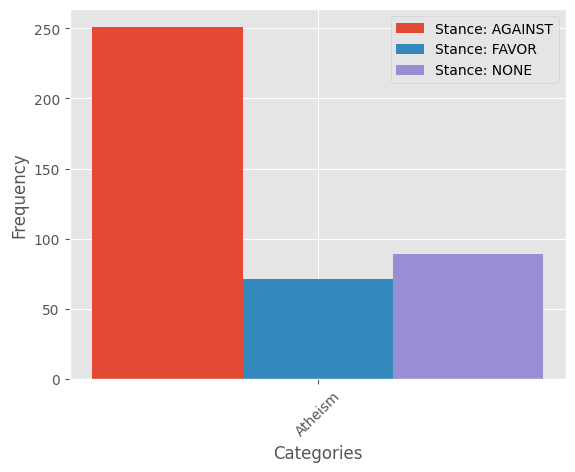

In [49]:
import matplotlib.pyplot as plt
import numpy as np

stances = temp_df['Stance'].unique()
targets = temp_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = temp_df[temp_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [50]:
temp_df["Stance"].value_counts()


AGAINST    251
NONE        89
FAVOR       71
Name: Stance, dtype: int64

The stance favor and none are under represented in the data so performing data augmentation and populating the data

In [51]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "FAVOR" or row["Stance"] == "NONE":
        augmented_text = get_synonyms(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [52]:
augmented_df = pd.DataFrame(augmented_data)

In [53]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [54]:
augmented_df['Tweet']

121    ['Could all those world health organization be...
453    ['and then dim that politicians in the U. Reci...
344    ["@ DragonflyJonez @ GKJill Yeah, well, atomic...
353    ['@ ChooseToBFree @ xfranman @ NBCNews Thomas ...
386    ['Remeber. .. the difference between bumble bl...
                             ...                        
479    ['Graven image blessed you with 100 dollars? A...
285    ['Never pay back then busy get a living that y...
408    ['It was a lot of playfulness hearing @ SethAn...
190    ['Information technology is non the clip for p...
360    ['@ WBCSaysRepent How do you feel instantly yo...
Name: Tweet, Length: 160, dtype: object

In [55]:
combineda_df = pd.concat([temp_df, augmented_df], ignore_index=True)

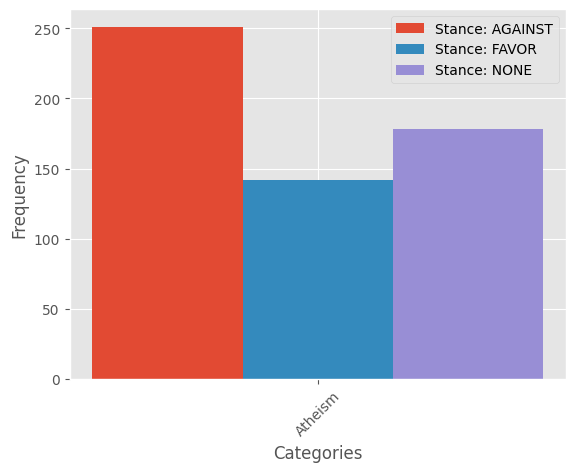

In [56]:
import matplotlib.pyplot as plt
import numpy as np

stances = combineda_df['Stance'].unique()
targets = combineda_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combineda_df[combineda_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Stance Favor is still in the minority but the stance none is better represented so further using augmentation techniques on FAVOR

In [57]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "FAVOR":
        augmented_text = get_translate(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [58]:
augmented_df = pd.DataFrame(augmented_data)

In [59]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [60]:
augmented_df['Tweet']

121    Everyone who believes in a god could leave. Th...
453    So stupid that politicians in the United State...
353    @Choosetobfree @xfranman @nbcnews Thomas Jeffe...
338    Don't do anything for #God, do everything for ...
110    Everyone is able to believe in what they want....
                             ...                        
201                God of gaps is not proof #next #Semst
146    Is to ask an atheist day! Having a question? #...
416    A pair of hands working 2gether is much better...
408    It was very fun to hear @Sethandrewstta Talkin...
360    @WbCSAYSREPERPE how do you feel now bad, homop...
Name: Tweet, Length: 71, dtype: object

In [61]:
combinedat_df = pd.concat([combineda_df, augmented_df], ignore_index=True)

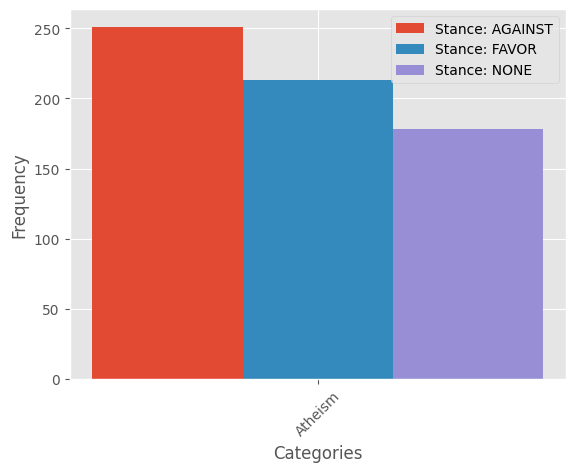

In [62]:
stances = combinedat_df['Stance'].unique()
targets = combinedat_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedat_df[combinedat_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Data Though not equally represented the minority class have a better representation in the data

### Target = Feminist Movement

In [63]:
temp_df=train_df[train_df['Target']=='Feminist Movement']

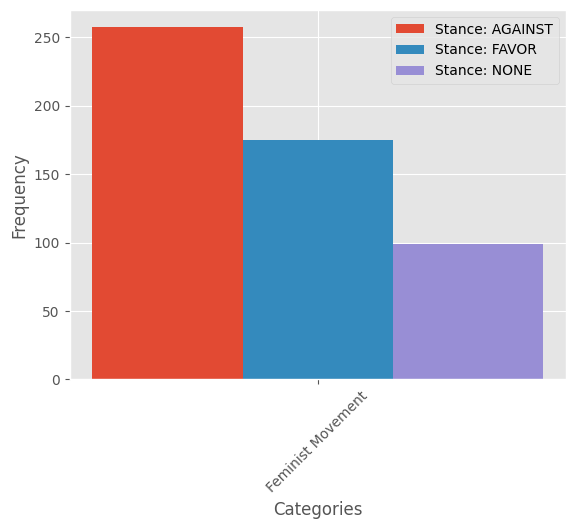

In [64]:
import matplotlib.pyplot as plt
import numpy as np

stances = temp_df['Stance'].unique()
targets = temp_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = temp_df[temp_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [65]:
temp_df['Stance'].value_counts()



AGAINST    257
FAVOR      175
NONE        99
Name: Stance, dtype: int64

Here None Stance is highly under represented

In [66]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "NONE":
        augmented_text = get_translate(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [67]:
augmented_df = pd.DataFrame(augmented_data)


In [68]:
augmented_df['Tweet']

1363    RT @mrkrusader: @Atorneybharti @timesNow @ndtv...
1317    Gender research helps develop theoretical nurs...
1367    Pop Quiz: What is the biggest fear of the oppr...
1110    @james_wtf do not say these annoying truths. T...
1212    Hey Guyz I'm talking about Baltimore * Social ...
                              ...                        
1636    `` Half victims, half complices, like everyone...
1081    Meredith giving to Don Crap was great, but sai...
1296    @Luisaomaielan Amazing Show in Leicester Tonig...
1046    Extinction of insects, dangerous herbs, gigolo...
1635    RT @SteveoortCloud: My dream in life is to kis...
Name: Tweet, Length: 99, dtype: object

In [69]:
augmented_df['Stance'].value_counts()


NONE    99
Name: Stance, dtype: int64

In [70]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [71]:
combinedf_df = pd.concat([temp_df, augmented_df], ignore_index=True)


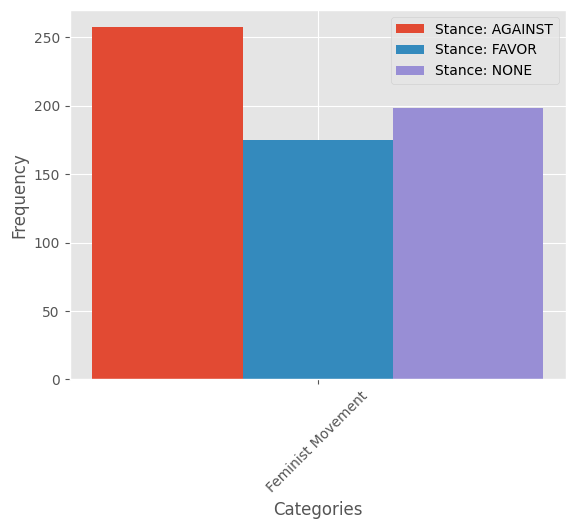

In [72]:
import matplotlib.pyplot as plt
import numpy as np

stances = combinedf_df['Stance'].unique()
targets = combinedf_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedf_df[combinedf_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Data is better represnted for each class

### Target = Legalization of Abortion

In [73]:
train_df['Target'].value_counts()

Hillary Clinton                     551
Feminist Movement                   531
Legalization of Abortion            522
Atheism                             411
Climate Change is a Real Concern    316
Name: Target, dtype: int64

In [74]:
temp_df=train_df[train_df['Target']=='Legalization of Abortion']

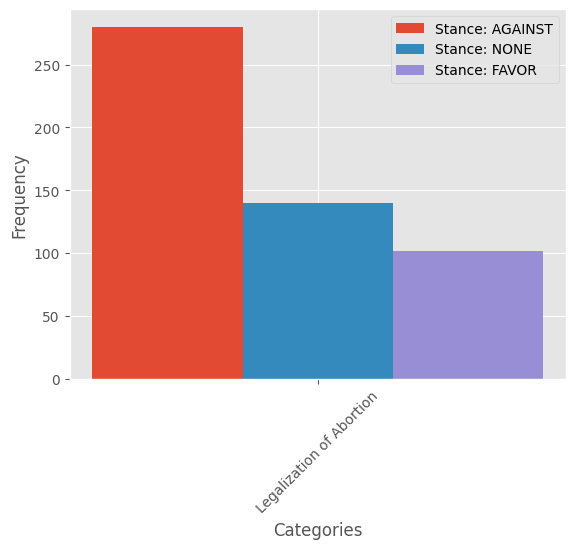

In [75]:
import matplotlib.pyplot as plt
import numpy as np

stances = temp_df['Stance'].unique()
targets = temp_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = temp_df[temp_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [76]:
temp_df["Stance"].value_counts()


AGAINST    280
NONE       140
FAVOR      102
Name: Stance, dtype: int64

Data for Stance NONE and FAVOR are quite low using augmentation through back translation to populate the data

In [77]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "FAVOR" or row["Stance"] == "NONE":
        augmented_text = get_translate(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [78]:
augmented_df = pd.DataFrame(augmented_data)

In [79]:
augmented_df['Tweet']

2402    As you could try to push me on me anyway but I...
2337    @Azzarellijim not so great for women you want ...
2753    It's time to make a change in my boxing style,...
2794    Our minds live - through the family line - Onc...
2495    Which does not reduce the abortions: -Mergal t...
                              ...                        
2391    Oh look !!! thus, not only are antichoiques st...
2601    Each good Christian wants to ensure that "thes...
2378    I think Marcus is slightly afraid of my radica...
2499    @Crushthecfr Yes, you have heard the first 500...
2513    Praise to the judge of the district court Larr...
Name: Tweet, Length: 242, dtype: object

In [80]:
augmented_df['Stance'].value_counts()

NONE     140
FAVOR    102
Name: Stance, dtype: int64

In [81]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [82]:
combinedl_df = pd.concat([temp_df, augmented_df], ignore_index=True)


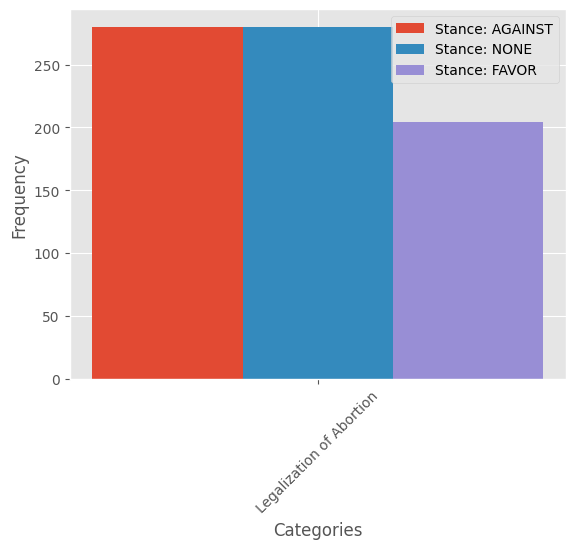

In [83]:
import matplotlib.pyplot as plt
import numpy as np

stances = combinedl_df['Stance'].unique()
targets = combinedl_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedl_df[combinedl_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [84]:
combinedl_df['Stance'].value_counts()

AGAINST    280
NONE       280
FAVOR      204
Name: Stance, dtype: int64

Data is better represented for each class in the current target

### Target = Climate Change is a Real Concern

In [85]:
temp_df=train_df[train_df['Target']=='Climate Change is a Real Concern']


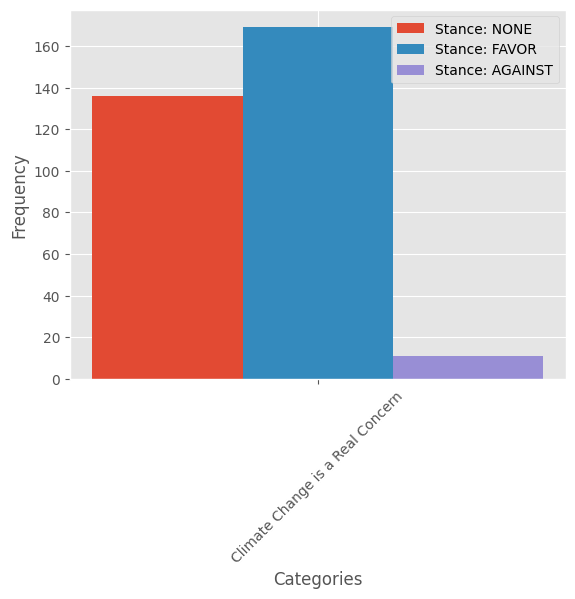

In [86]:
import matplotlib.pyplot as plt
import numpy as np

stances = temp_df['Stance'].unique()
targets = temp_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = temp_df[temp_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In this target the Stance AGAINST is highly under represented adding in augmented data to make it a little better

In [87]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "AGAINST":
        augmented_text = get_synonyms(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [88]:
augmented_df = pd.DataFrame(augmented_data)

In [89]:
augmented_df['Tweet']


952    ['If ther clmate change alarmists come out in ...
622    ['The Climate Change people constitute disgust...
947    ['BrettGarrot: BrettGarrot: GlblWarmingNews An...
902    ["Ace ' m sick of celebrities who cerebrate co...
944    ["World wide Thawing! Global Warming! Global W...
948    ['When did CO2 suit a dangerous pollutant that...
659    ['BREAKING: This just in, an ocean wafture jus...
692    ['Last time I check, Al Panel is a politician,...
945    ['GlblWarmingNews And the tooth fairy power be...
907    ['Noted climatologist, marine life scientist, ...
905    ['Artic Ice mellow in ten years for the month ...
Name: Tweet, dtype: object

In [90]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [91]:
combinedc_df = pd.concat([temp_df, augmented_df], ignore_index=True)



In [92]:
augmented_data = []
for index, row in temp_df.iterrows():
    if row["Stance"] == "AGAINST":
        augmented_text = get_translate(row["Tweet"])
        augmented_row = row.copy()
        augmented_row["Tweet"] = augmented_text
        augmented_data.append(augmented_row)

In [93]:
augmented_df = pd.DataFrame(augmented_data)

In [94]:
augmented_df['Tweet']

952    If the alarmists of climate change go out in S...
622    The people of climate change are disgusting as...
947    Brett Garrot: Brettgarrot: News from global wa...
902    I am tired of celebrities who think that being...
944    Global warming! Global warming! Global warming...
948    When CO2 has become a dangerous pollutant that...
659    Breaking: this just in, an ocean wave broke a ...
692    The last time I checked, Al Gore is a politici...
945    The news of global warming and the teeth could...
907    The climatologist, marine biologist and oceano...
905    The highest Arctic Ice in 10 years for the mon...
Name: Tweet, dtype: object

In [95]:
null_counts = augmented_df.isnull().sum()
print("Columns with null values:")
print(null_counts[null_counts > 0])

Columns with null values:
Series([], dtype: int64)


In [96]:
combinedcc_df = pd.concat([combinedc_df, augmented_df], ignore_index=True)

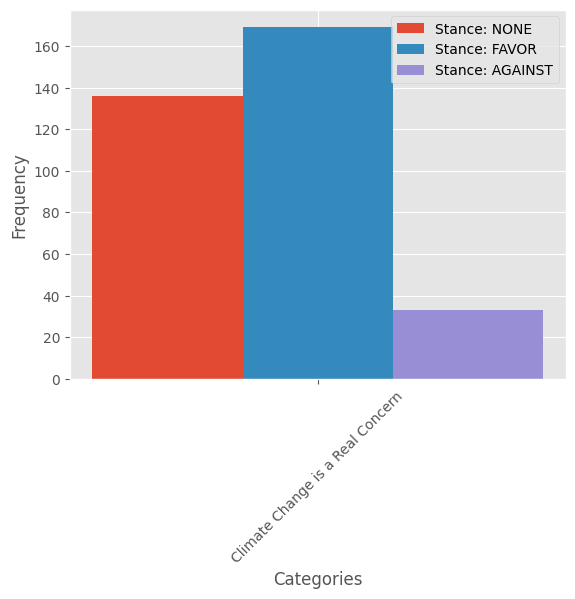

In [97]:
import matplotlib.pyplot as plt
import numpy as np

stances = combinedcc_df['Stance'].unique()
targets = combinedcc_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = combinedcc_df[combinedcc_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Data still under represented but better than before

In [98]:
train_comb_df = pd.concat([combinedhc_df, combinedat_df, combinedf_df, combinedl_df, combinedcc_df], ignore_index=True)

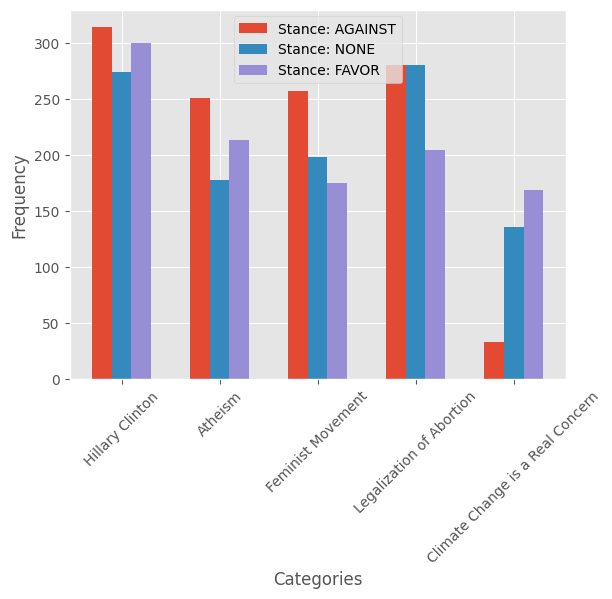

In [99]:
import matplotlib.pyplot as plt
import numpy as np

stances = train_comb_df['Stance'].unique()
targets = train_comb_df['Target'].unique()

bar_width = 0.2
index = np.arange(len(targets))

for i, stance in enumerate(stances):
    subset = train_comb_df[train_comb_df['Stance'] == stance]
    stance_counts = [subset[subset['Target'] == target].shape[0] for target in targets]
    plt.bar(index + i * bar_width, stance_counts, bar_width, label=f'Stance: {stance}')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(index + bar_width * (len(stances) - 1) / 2, targets)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [100]:
train_comb_df.shape


(3262, 5)

In [101]:
train_df.shape

(2331, 5)

Data still unbalanced but better represented for each target
calculating class weights to handle the unbalanced data better

## Data Pre Processing

In [102]:
nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [103]:
sporter = WordNetLemmatizer()

In [104]:
import re

In [105]:
def pre_process_data(dataframe):
  train_concatenate = list()
  lines = dataframe['Tweet'].values.tolist()
  targets = dataframe['Target'].values.tolist()

  for line, target in zip(lines, targets):
    # tokenize the text
    line = str(line)
    line = re.sub(r'http\S+|www\S+|https\S+', '', str(line)) #handling URL, @values and hashtags
    line = re.sub(r'(@\w+)|(#\w+)', '', str(line))
    tokens = word_tokenize(line)

    # convert to lower case
    tokens = [w.lower() for w in tokens]


    # remove puntuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove non alphabetic characters
    words = [word for word in stripped if word.isalpha()]

    # remove stopwords
    clean_word = [word for word in words if word not in stopword]

    #Lemmatizing the word to get the generic version of the word
    lem_word = [sporter.lemmatize(word) for word in clean_word]

    #combining target value with the word
    concat_data = lem_word + [target]

    train_concatenate.append(concat_data)
  return train_concatenate

In [106]:
train_stance_lines = pre_process_data(train_comb_df)

In [107]:
valid_stance_lines = pre_process_data(valid_df)

In [108]:
test_stance_lines = pre_process_data(Test_df)

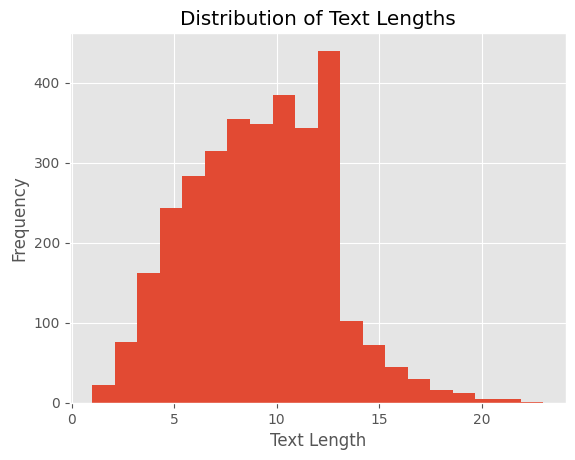

Mean Length: 9.076640098099325
Median Length: 9.0
Standard Deviation: 3.3364769551043074


In [109]:
import numpy as np
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in train_stance_lines]

mean_length = np.mean(text_lengths)
median_length = np.median(text_lengths)
std_deviation = np.std(text_lengths)

plt.hist(text_lengths, bins=20)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

print(f"Mean Length: {mean_length}")
print(f"Median Length: {median_length}")
print(f"Standard Deviation: {std_deviation}")

Maximum length of a sentence is below 25

Encoding the stance values

In [110]:
label_encoder = LabelEncoder()
train_comb_df['Label'] = label_encoder.fit_transform(train_comb_df['Stance'])
valid_df['Label'] = label_encoder.fit_transform(valid_df['Stance'])
Test_df['Label'] = label_encoder.fit_transform(Test_df['Stance'])


Using One hot encodding

In [111]:
from tensorflow.keras.utils import to_categorical


train_labels = to_categorical(train_comb_df['Label'], num_classes=3)
valid_labels = to_categorical(valid_df['Label'], num_classes=3)
test_labels = to_categorical(Test_df['Label'], num_classes=3)

## Setting up the data loader

As Maximum length of sentences are 20 taking a padding length of 25

In [114]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_stance_lines)


train_sequences = tokenizer.texts_to_sequences(train_stance_lines)
val_sequences = tokenizer.texts_to_sequences(valid_stance_lines)
test_sequences = tokenizer.texts_to_sequences(test_stance_lines)



In [115]:
max_length = 25
train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_sequences = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')



In [116]:
from pygments import token
BUFFER_SIZE = len(train_sequences)
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_sequences, valid_labels))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels))
test_dataset = test_dataset.batch(BATCH_SIZE)



Setting up a plotter function

In [118]:
from itertools import cycle
def plotter(history_hold, metric = 'SparseCategoricalCrossentropy', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

As per the research done on estimating distributed performance in Disaster related Social media classification results seem to show that the word embedding models performed almost similar to the transformer model. So basing the base model on glove model trained on twitter data

## Base Model

In [119]:
import gensim.downloader as api
wv = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [120]:
wv

In [121]:
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))  # Assuming 100-dimensional embeddings
for word, index in tokenizer.word_index.items():
    if word in wv:
        embedding_matrix[index] = wv[word]

In [122]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42188001, -0.028569  ,  0.73321998, ...,  0.14094   ,
        -0.98385   ,  0.15913001],
       [-0.29616001, -0.34762001, -0.14932001, ...,  0.20936   ,
         0.25814   , -0.1056    ]])

In [123]:
non_zero_indices = np.any(embedding_matrix != 0, axis=1)

In [124]:
non_zero_word_indices = np.where(non_zero_indices)[0]

In [125]:
len(non_zero_word_indices)

5497

In [126]:
word_index = tokenizer.word_index

In [127]:
import pathlib
import shutil
import tempfile


In [128]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/models

<IPython.core.display.Javascript object>

In [129]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)



In [130]:
def get_callbacks(name):
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [131]:
from tensorflow.keras.layers import Bidirectional,Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_e = Sequential()
model_glove_e.add(embedding_layer_TL)
model_glove_e.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_e.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25)))
model_glove_e.add(Dense(512,activation='relu'))
model_glove_e.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
model_glove_e.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=metrics)
model_glove_e.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           621000    
                                                                 
 bidirectional (Bidirection  (None, 25, 64)            34048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 714699 (2.73 MB)
Trainable params: 93699 (

In [132]:
m_histories = {}
m_histories['with_TL'] = model_glove_e.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL'),verbose=1)

Epoch 1/50
51/51 [==============================] - 28s 242ms/step - loss: 1.0771 - accuracy: 0.4031 - auc: 0.5865 - precision: 0.5532 - recall: 0.0159 - f1_score: 0.3974 - val_loss: 1.0696 - val_accuracy: 0.3465 - val_auc: 0.5852 - val_precision: 0.5192 - val_recall: 0.0463 - val_f1_score: 0.3406
Epoch 2/50
51/51 [==============================] - 8s 149ms/step - loss: 1.0064 - accuracy: 0.4923 - auc: 0.6815 - precision: 0.5886 - recall: 0.2180 - f1_score: 0.4886 - val_loss: 1.0066 - val_accuracy: 0.4666 - val_auc: 0.6699 - val_precision: 0.6426 - val_recall: 0.2590 - val_f1_score: 0.4493
Epoch 3/50
51/51 [==============================] - 10s 191ms/step - loss: 0.9405 - accuracy: 0.5383 - auc: 0.7350 - precision: 0.6289 - recall: 0.3544 - f1_score: 0.5331 - val_loss: 0.9934 - val_accuracy: 0.5060 - val_auc: 0.6927 - val_precision: 0.5658 - val_recall: 0.3465 - val_f1_score: 0.4954
Epoch 4/50
51/51 [==============================] - 10s 205ms/step - loss: 0.9011 - accuracy: 0.5760 - a

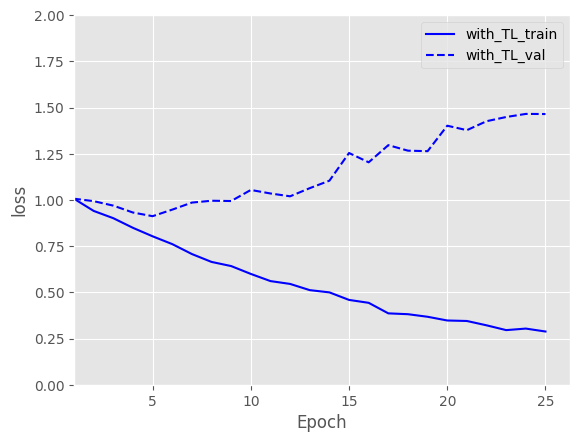

In [133]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

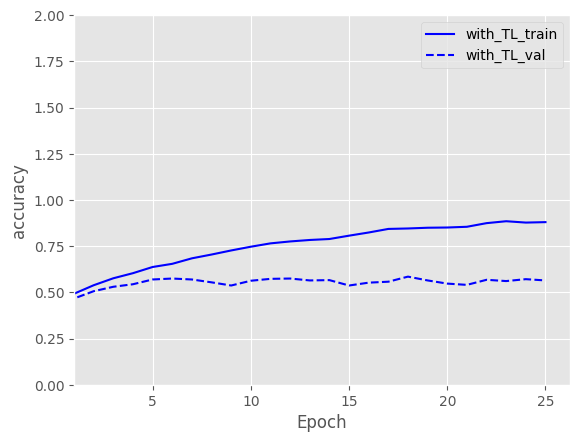

In [134]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')


In [135]:
val_metrics = model_glove_e.evaluate(val_dataset)
metric_names = model_glove_e.metrics_names
metric_values = val_metrics


for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 20ms/step - loss: 1.4647 - accuracy: 0.5643 - auc: 0.7386 - precision: 0.5704 - recall: 0.5420 - f1_score: 0.5401
loss: 1.4647384881973267
accuracy: 0.5643224716186523
auc: 0.7385815382003784
precision: 0.570397138595581
recall: 0.5420240163803101
f1_score: 0.5400657057762146


### Conclusion
* The Model is overfitting
* Adding in the class weights

## Model 1.1 Base model with class weights

In [136]:
from sklearn.utils.class_weight import compute_class_weight
class_labels = train_comb_df['Label']
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}



In [137]:
class_labels

0       0
1       0
2       0
3       0
4       0
       ..
3257    0
3258    0
3259    0
3260    0
3261    0
Name: Label, Length: 3262, dtype: int64

In [138]:
class_weights_dict

{0: 0.9580029368575624, 1: 1.0248193528118128, 2: 1.0200125078173858}

In [139]:
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_c = Sequential()
model_glove_c.add(embedding_layer_TL)
model_glove_c.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_c.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25)))
model_glove_c.add(Dense(512,activation='relu'))
model_glove_c.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
model_glove_c.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=metrics)
model_glove_c.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 25, 64)            34048     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 512)               33280     
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 714699 (2.73 MB)
Trainable params: 93699

In [140]:
m_histories['with_TL_cw'] = model_glove_c.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 27s 192ms/step - loss: 1.0667 - accuracy: 0.4071 - auc: 0.6049 - precision: 0.5160 - recall: 0.0445 - f1_score: 0.3935 - val_loss: 0.9950 - val_accuracy: 0.5094 - val_auc: 0.6865 - val_precision: 0.6056 - val_recall: 0.2607 - val_f1_score: 0.4290
Epoch 2/50
51/51 [==============================] - 9s 167ms/step - loss: 0.9873 - accuracy: 0.4994 - auc: 0.6946 - precision: 0.5893 - recall: 0.2437 - f1_score: 0.4947 - val_loss: 0.9721 - val_accuracy: 0.5197 - val_auc: 0.7101 - val_precision: 0.5780 - val_recall: 0.3431 - val_f1_score: 0.4462
Epoch 3/50
51/51 [==============================] - 10s 191ms/step - loss: 0.9368 - accuracy: 0.5527 - auc: 0.7352 - precision: 0.6237 - recall: 0.3624 - f1_score: 0.5465 - val_loss: 0.9378 - val_accuracy: 0.5540 - val_auc: 0.7363 - val_precision: 0.6165 - val_recall: 0.3722 - val_f1_score: 0.5222
Epoch 4/50
51/51 [==============================] - 7s 142ms/step - loss: 0.8822 - accuracy: 0.5831 - au

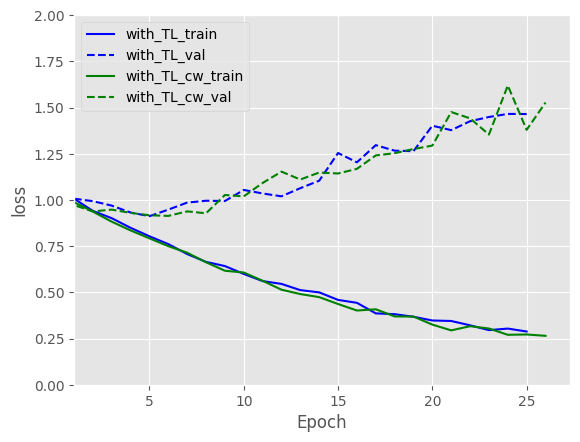

In [141]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

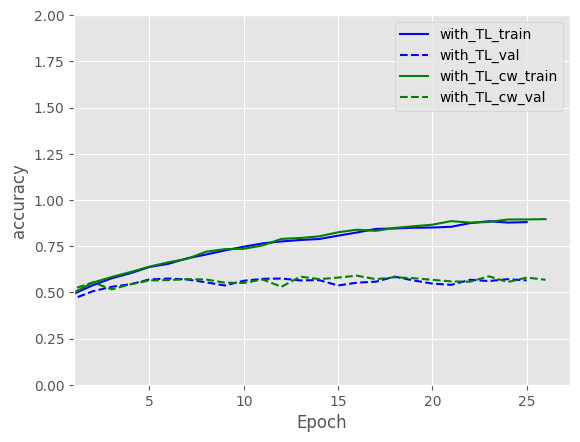

In [142]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')

In [143]:
val_metrics = model_glove_c.evaluate(val_dataset)
metric_names = model_glove_c.metrics_names
metric_values = val_metrics

# Print the metric names and values
for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 24ms/step - loss: 1.5267 - accuracy: 0.5678 - auc: 0.7426 - precision: 0.5699 - recall: 0.5386 - f1_score: 0.5416
loss: 1.526733636856079
accuracy: 0.5677530169487
auc: 0.7425755262374878
precision: 0.5698729753494263
recall: 0.5385934710502625
f1_score: 0.54160475730896


#### Conclusion
* The Model is overfitting
* Adding in a Global Average Pooling to the model and a dropout layer

## Model 1.2 Base model with GAP layer

In [144]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import AUC, Precision, Recall
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_g = Sequential()
model_glove_g.add(embedding_layer_TL)
model_glove_g.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_g.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_g.add(GlobalAveragePooling1D())
model_glove_g.add(Dense(512,activation='relu'))
model_glove_g.add(Dropout(0.25))

model_glove_g.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
model_glove_g.compile(loss='categorical_crossentropy',
                    optimizer='adam', metrics=metrics)
model_glove_g.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 25, 64)            34048     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 25, 64)            24832     
 onal)                                                           
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_4 (Dense)             (None, 512)               33280     
                                                      

In [145]:
m_histories['with_TL_GAP'] = model_glove_g.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_GAP'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 27s 213ms/step - loss: 1.0673 - accuracy: 0.4258 - auc: 0.6044 - precision: 0.5634 - recall: 0.0368 - f1_score: 0.4226 - val_loss: 1.0117 - val_accuracy: 0.5146 - val_auc: 0.6713 - val_precision: 0.6289 - val_recall: 0.2093 - val_f1_score: 0.4600
Epoch 2/50
51/51 [==============================] - 10s 199ms/step - loss: 0.9945 - accuracy: 0.5046 - auc: 0.6907 - precision: 0.5915 - recall: 0.2615 - f1_score: 0.4967 - val_loss: 0.9674 - val_accuracy: 0.5369 - val_auc: 0.7217 - val_precision: 0.5859 - val_recall: 0.3859 - val_f1_score: 0.4397
Epoch 3/50
51/51 [==============================] - 7s 146ms/step - loss: 0.9345 - accuracy: 0.5527 - auc: 0.7380 - precision: 0.6236 - recall: 0.3844 - f1_score: 0.5483 - val_loss: 0.9378 - val_accuracy: 0.5523 - val_auc: 0.7370 - val_precision: 0.5971 - val_recall: 0.4168 - val_f1_score: 0.4894
Epoch 4/50
51/51 [==============================] - 9s 183ms/step - loss: 0.8789 - accuracy: 0.5895 - au

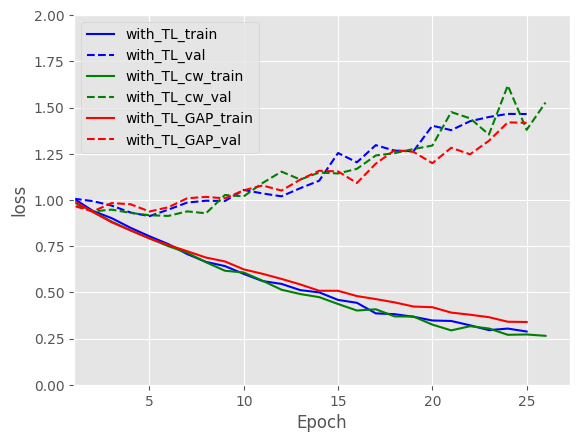

In [146]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

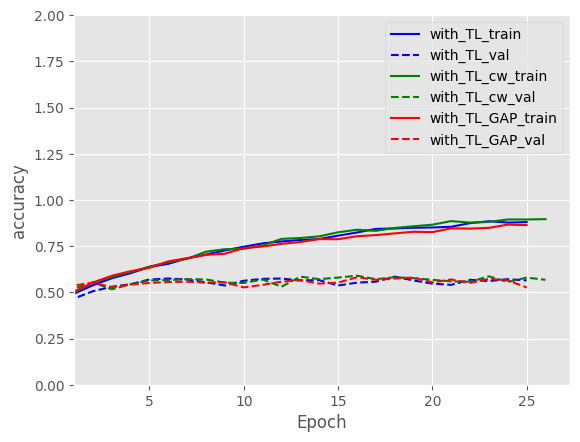

In [147]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')


In [148]:
val_metrics = model_glove_g.evaluate(val_dataset)
metric_names = model_glove_g.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 21ms/step - loss: 1.4172 - accuracy: 0.5266 - auc: 0.7305 - precision: 0.5416 - recall: 0.5026 - f1_score: 0.5151
loss: 1.4171946048736572
accuracy: 0.5265865921974182
auc: 0.7304936647415161
precision: 0.5415896773338318
recall: 0.5025728940963745
f1_score: 0.5150832533836365


#### Conclusion
* The model performed better but overfitting still exists
* Adding a learning rate schedule with time decay to improve with overfitting

## Model 1.3 Base with learning rate scheduler

In [149]:
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_lr = Sequential()
model_glove_lr.add(embedding_layer_TL)
model_glove_lr.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_lr.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_lr.add(GlobalAveragePooling1D())
model_glove_lr.add(Dense(512,activation='relu'))
model_glove_lr.add(Dropout(0.25))

model_glove_lr.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_glove_lr.compile(loss='categorical_crossentropy',
                    optimizer=optimizer, metrics=metrics)
model_glove_lr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 25, 64)            34048     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 25, 64)            24832     
 onal)                                                           
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 512)               33280     
                                                      

In [150]:
m_histories['with_TL_LR'] = model_glove_lr.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_LR'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 27s 220ms/step - loss: 1.0761 - accuracy: 0.4093 - auc: 0.5930 - precision: 0.6292 - recall: 0.0172 - f1_score: 0.4082 - val_loss: 1.0108 - val_accuracy: 0.5077 - val_auc: 0.6789 - val_precision: 0.6017 - val_recall: 0.1218 - val_f1_score: 0.4489
Epoch 2/50
51/51 [==============================] - 8s 148ms/step - loss: 0.9947 - accuracy: 0.5086 - auc: 0.6914 - precision: 0.5983 - recall: 0.2379 - f1_score: 0.5031 - val_loss: 0.9653 - val_accuracy: 0.5266 - val_auc: 0.7140 - val_precision: 0.6149 - val_recall: 0.3671 - val_f1_score: 0.4808
Epoch 3/50
51/51 [==============================] - 9s 174ms/step - loss: 0.9466 - accuracy: 0.5346 - auc: 0.7277 - precision: 0.6037 - recall: 0.3489 - f1_score: 0.5296 - val_loss: 0.9761 - val_accuracy: 0.5266 - val_auc: 0.7050 - val_precision: 0.5821 - val_recall: 0.3465 - val_f1_score: 0.5120
Epoch 4/50
51/51 [==============================] - 10s 199ms/step - loss: 0.8923 - accuracy: 0.5754 - au

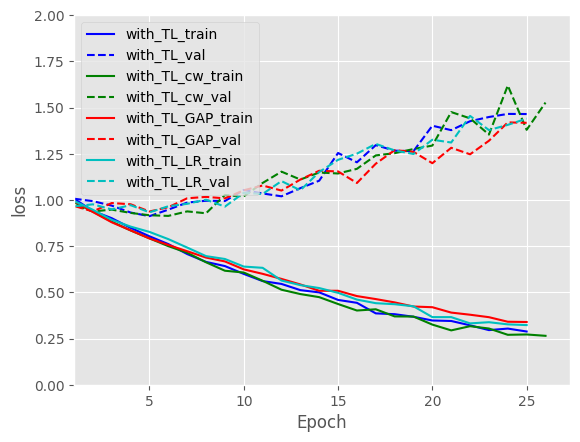

In [151]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

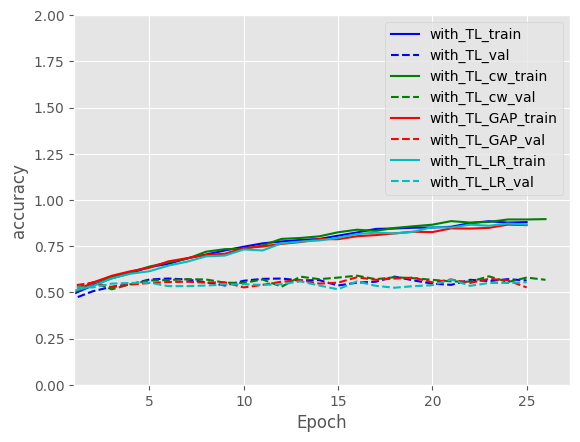

In [152]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')

In [153]:
val_metrics = model_glove_lr.evaluate(val_dataset)
metric_names = model_glove_lr.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 22ms/step - loss: 1.4401 - accuracy: 0.5540 - auc: 0.7398 - precision: 0.5688 - recall: 0.5386 - f1_score: 0.5276
loss: 1.4400678873062134
accuracy: 0.5540308952331543
auc: 0.7397511005401611
precision: 0.5688405632972717
recall: 0.5385934710502625
f1_score: 0.5275929570198059


### Conclusion
* The model has performed better keeping the LR scheduler as it is in the model
* Reducing the units of the dense layer

## Model 1.4 Base model with lower units in the dense layer

In [154]:
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_u = Sequential()
model_glove_u.add(embedding_layer_TL)
model_glove_u.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_u.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_u.add(GlobalAveragePooling1D())
model_glove_u.add(Dense(256,activation='relu'))
model_glove_u.add(Dropout(0.3))

model_glove_u.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


model_glove_u.compile(loss='categorical_crossentropy',
                    optimizer=optimizer, metrics=metrics)
model_glove_u.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_8 (Bidirecti  (None, 25, 64)            34048     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 25, 64)            24832     
 onal)                                                           
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               16640     
                                                      

In [155]:
m_histories['with_TL_256_u'] = model_glove_u.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_256_u'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 27s 219ms/step - loss: 1.0759 - accuracy: 0.4139 - auc: 0.5932 - precision: 0.6757 - recall: 0.0077 - f1_score: 0.4057 - val_loss: 1.0234 - val_accuracy: 0.4940 - val_auc: 0.6652 - val_precision: 0.6917 - val_recall: 0.1578 - val_f1_score: 0.4491
Epoch 2/50
51/51 [==============================] - 8s 165ms/step - loss: 1.0062 - accuracy: 0.4899 - auc: 0.6800 - precision: 0.5827 - recall: 0.2474 - f1_score: 0.4848 - val_loss: 0.9595 - val_accuracy: 0.5472 - val_auc: 0.7224 - val_precision: 0.6532 - val_recall: 0.3328 - val_f1_score: 0.5006
Epoch 3/50
51/51 [==============================] - 7s 145ms/step - loss: 0.9517 - accuracy: 0.5374 - auc: 0.7273 - precision: 0.6138 - recall: 0.3489 - f1_score: 0.5341 - val_loss: 0.9339 - val_accuracy: 0.5489 - val_auc: 0.7430 - val_precision: 0.6282 - val_recall: 0.3739 - val_f1_score: 0.5061
Epoch 4/50
51/51 [==============================] - 9s 181ms/step - loss: 0.9017 - accuracy: 0.5733 - auc

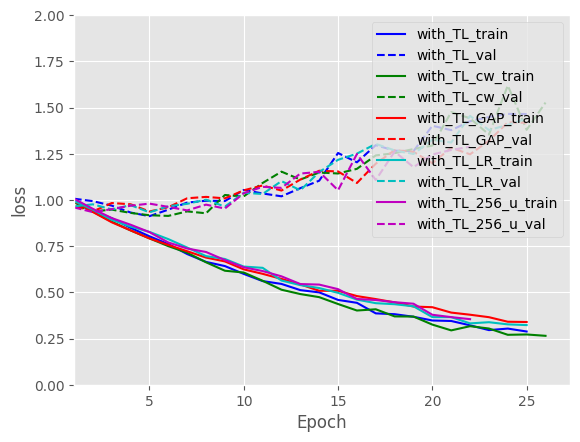

In [156]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

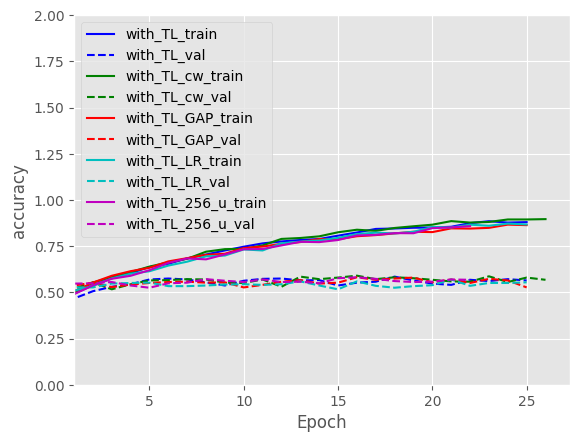

In [157]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')

In [158]:
val_metrics = model_glove_u.evaluate(val_dataset)
metric_names = model_glove_u.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 23ms/step - loss: 1.2881 - accuracy: 0.5678 - auc: 0.7552 - precision: 0.5803 - recall: 0.5455 - f1_score: 0.5550
loss: 1.2881226539611816
accuracy: 0.5677530169487
auc: 0.7552193999290466
precision: 0.5802919864654541
recall: 0.5454545617103577
f1_score: 0.5550394654273987


### Conclusion
* Model is still overfitting further reducing the units of the dense layer

## Model 1.5 Base model with lower units in the dense layer 128

In [159]:
embedding_dim = 100
embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_u128 = Sequential()
model_glove_u128.add(embedding_layer_TL)
model_glove_u128.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_u128.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_u128.add(GlobalAveragePooling1D())
model_glove_u128.add(Dense(128,activation='relu'))
model_glove_u128.add(Dropout(0.3))

model_glove_u128.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]
learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_u128.compile(loss='categorical_crossentropy',
                    optimizer=optimizer, metrics=metrics)
model_glove_u128.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_10 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_3  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                      

In [160]:
m_histories['with_TL_128_u'] = model_glove_u128.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_128_u'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 26s 216ms/step - loss: 1.0848 - accuracy: 0.4028 - auc: 0.5814 - precision: 0.5000 - recall: 3.0656e-04 - f1_score: 0.4014 - val_loss: 1.0572 - val_accuracy: 0.4288 - val_auc: 0.6220 - val_precision: 0.5000 - val_recall: 0.0017 - val_f1_score: 0.4257
Epoch 2/50
51/51 [==============================] - 9s 181ms/step - loss: 1.0102 - accuracy: 0.4917 - auc: 0.6763 - precision: 0.5649 - recall: 0.2054 - f1_score: 0.4852 - val_loss: 0.9913 - val_accuracy: 0.5146 - val_auc: 0.6934 - val_precision: 0.6186 - val_recall: 0.2504 - val_f1_score: 0.4924
Epoch 3/50
51/51 [==============================] - 7s 141ms/step - loss: 0.9530 - accuracy: 0.5399 - auc: 0.7271 - precision: 0.6068 - recall: 0.3449 - f1_score: 0.5371 - val_loss: 0.9499 - val_accuracy: 0.5472 - val_auc: 0.7309 - val_precision: 0.6171 - val_recall: 0.4340 - val_f1_score: 0.4984
Epoch 4/50
51/51 [==============================] - 10s 193ms/step - loss: 0.9167 - accuracy: 0.5659 

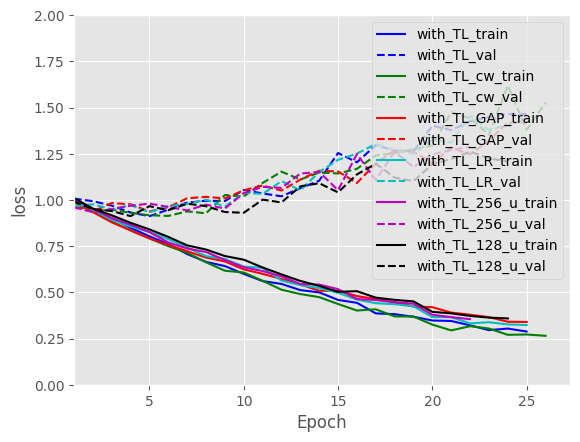

In [161]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'loss')

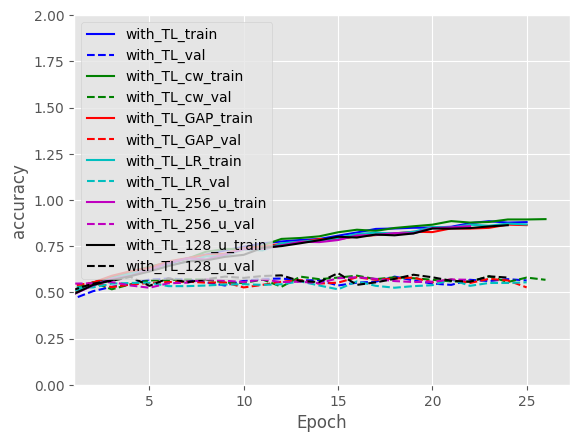

In [162]:
plotter(m_histories, ylim=[0.0, 2.0], metric = 'accuracy')

In [163]:
val_metrics = model_glove_u128.evaluate(val_dataset)
metric_names = model_glove_u128.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 23ms/step - loss: 1.2076 - accuracy: 0.5798 - auc: 0.7647 - precision: 0.5945 - recall: 0.5557 - f1_score: 0.5631
loss: 1.2076119184494019
accuracy: 0.5797598361968994
auc: 0.7646967768669128
precision: 0.594495415687561
recall: 0.5557461380958557
f1_score: 0.5630508065223694


### Conclusion
* There stll seems to be overfitting and the overall performance of the model has increased.
* applying regularization to the model

## Model 1.6 Adding Regularization

In [176]:
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.regularizers import l2

embedding_dim = 100
l2_lambda = 0.1

embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_r = Sequential()
model_glove_r.add(embedding_layer_TL)
model_glove_r.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r.add(GlobalAveragePooling1D())


model_glove_r.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_glove_r.add(Dropout(0.3))

model_glove_r.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]

learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_r.compile(loss='categorical_crossentropy',
                      optimizer=optimizer, metrics=metrics)
model_glove_r.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 25, 100)           621000    
                                                                 
 bidirectional_18 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_19 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_7  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                      

In [177]:
m_history={}
m_history['with_TL_r'] = model_glove_r.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_r'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 43s 367ms/step - loss: 6.7696 - accuracy: 0.3761 - auc: 0.5507 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3571 - val_loss: 4.4085 - val_accuracy: 0.4768 - val_auc: 0.6463 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4109
Epoch 2/50
51/51 [==============================] - 13s 261ms/step - loss: 3.1522 - accuracy: 0.4660 - auc: 0.6454 - precision: 0.5714 - recall: 0.0441 - f1_score: 0.4416 - val_loss: 2.1959 - val_accuracy: 0.4991 - val_auc: 0.6584 - val_precision: 0.8594 - val_recall: 0.0943 - val_f1_score: 0.4487
Epoch 3/50
51/51 [==============================] - 13s 247ms/step - loss: 1.7046 - accuracy: 0.5150 - auc: 0.6950 - precision: 0.5937 - recall: 0.1787 - f1_score: 0.4988 - val_loss: 1.3593 - val_accuracy: 0.5489 - val_auc: 0.7062 - val_precision: 0.6373 - val_recall: 0.3345 - val_f1_score: 0.5256
Epoch 4/50
51/51 [==============================] - 9s 172ms/step - loss: 1.1754 - accu

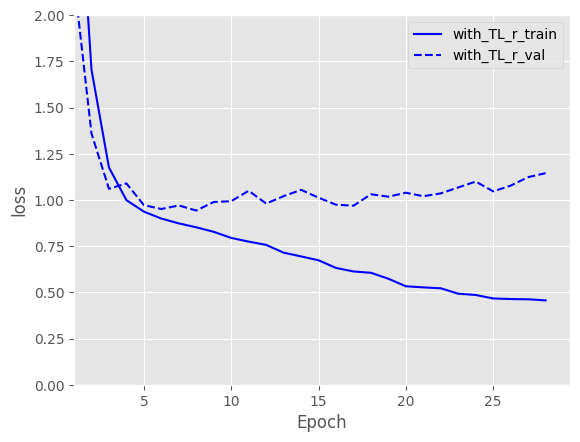

In [178]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

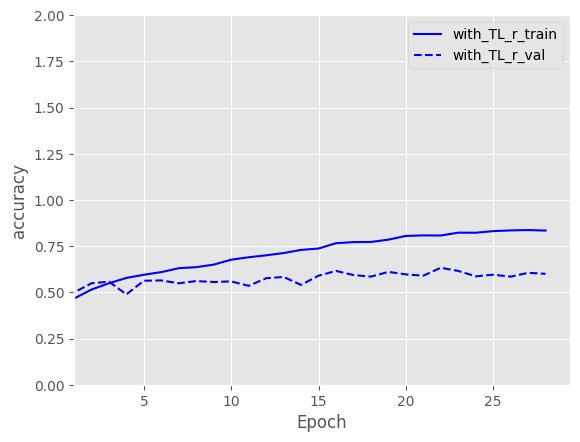

In [179]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'accuracy')

In [180]:
val_metrics = model_glove_r.evaluate(val_dataset)
metric_names = model_glove_r.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 25ms/step - loss: 1.1448 - accuracy: 0.6003 - auc: 0.7629 - precision: 0.6124 - recall: 0.5609 - f1_score: 0.5836
loss: 1.1447997093200684
accuracy: 0.6003430485725403
auc: 0.7628850936889648
precision: 0.6123595237731934
recall: 0.5608919262886047
f1_score: 0.5835880637168884


### Conclusion
* The model is still overfitting so reducing the learning rate  

## Model 1.7 Base model with regularization lambda = 0.1 lr = 0.00025

In [181]:
embedding_dim = 100
l2_lambda = 0.1

embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_r6 = Sequential()
model_glove_r6.add(embedding_layer_TL)
model_glove_r6.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r6.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r6.add(GlobalAveragePooling1D())


model_glove_r6.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_glove_r6.add(Dropout(0.3))

model_glove_r6.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]

learning_rate = 0.00025
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_r6.compile(loss='categorical_crossentropy',
                      optimizer=optimizer, metrics=metrics)
model_glove_r6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 25, 100)           621000    
                                                                 
 bidirectional_20 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_21 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_8  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                     

In [182]:
m_history['with_TL_r6'] = model_glove_r6.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_r6'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 29s 218ms/step - loss: 8.7144 - accuracy: 0.3461 - auc: 0.5327 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.2935 - val_loss: 7.8774 - val_accuracy: 0.3002 - val_auc: 0.5542 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.2706
Epoch 2/50
51/51 [==============================] - 7s 145ms/step - loss: 7.1779 - accuracy: 0.4059 - auc: 0.5832 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3991 - val_loss: 6.4959 - val_accuracy: 0.4048 - val_auc: 0.5948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4027
Epoch 3/50
51/51 [==============================] - 9s 183ms/step - loss: 5.9222 - accuracy: 0.4451 - auc: 0.6241 - precision: 1.0000 - recall: 9.1968e-04 - f1_score: 0.4431 - val_loss: 5.3565 - val_accuracy: 0.4786 - val_auc: 0.6334 - val_precision: 1.0000 - val_recall: 0.0069 - val_f1_score: 0.4086
Epoch 4/50
51/51 [==============================] - 10s 192ms/step - 

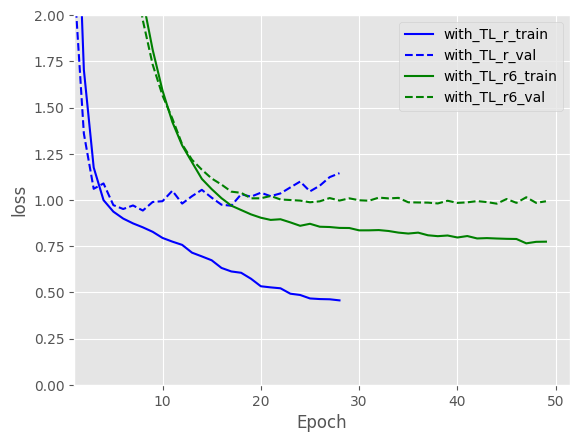

In [183]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

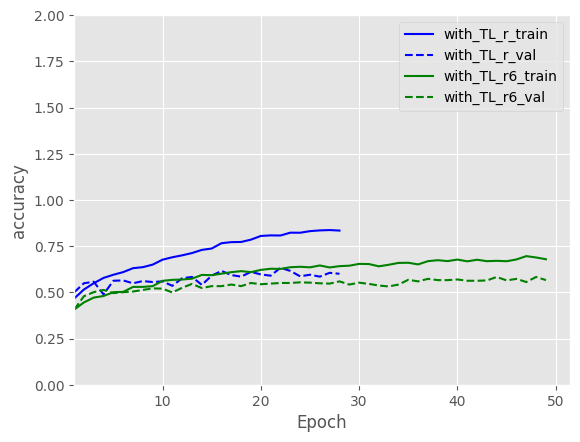

In [184]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'accuracy')

In [185]:
val_metrics = model_glove_r6.evaluate(val_dataset)
metric_names = model_glove_r6.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 26ms/step - loss: 0.9926 - accuracy: 0.5660 - auc: 0.7434 - precision: 0.6004 - recall: 0.5283 - f1_score: 0.5514
loss: 0.9926294088363647
accuracy: 0.5660377144813538
auc: 0.7434029579162598
precision: 0.600389838218689
recall: 0.5283018946647644
f1_score: 0.5514401793479919


### Conclusion
* The overfitting has reduced compared to previous model
* Trying to increase the lambda value further

## Model 1.8 Base model with regularization lambda = 0.2 lr = 0.00025

In [186]:
embedding_dim = 100
l2_lambda = 0.2

embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_r7 = Sequential()
model_glove_r7.add(embedding_layer_TL)
model_glove_r7.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r7.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r7.add(GlobalAveragePooling1D())


model_glove_r7.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_glove_r7.add(Dropout(0.3))

model_glove_r7.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]

learning_rate = 0.00025
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_r7.compile(loss='categorical_crossentropy',
                      optimizer=optimizer, metrics=metrics)
model_glove_r7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 25, 100)           621000    
                                                                 
 bidirectional_22 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_23 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_9  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_22 (Dense)            (None, 128)               8320      
                                                     

In [187]:
m_history['with_TL_r7'] = model_glove_r7.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_r7'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 27s 224ms/step - loss: 16.2773 - accuracy: 0.3415 - auc: 0.5230 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.2797 - val_loss: 14.6170 - val_accuracy: 0.3859 - val_auc: 0.5727 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.3260
Epoch 2/50
51/51 [==============================] - 8s 151ms/step - loss: 13.2311 - accuracy: 0.3771 - auc: 0.5584 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3594 - val_loss: 11.8826 - val_accuracy: 0.4117 - val_auc: 0.5887 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.3853
Epoch 3/50
51/51 [==============================] - 10s 198ms/step - loss: 10.7557 - accuracy: 0.4031 - auc: 0.5878 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3911 - val_loss: 9.6569 - val_accuracy: 0.4683 - val_auc: 0.6212 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4069
Epoch 4/50
51/51 [==============================] -

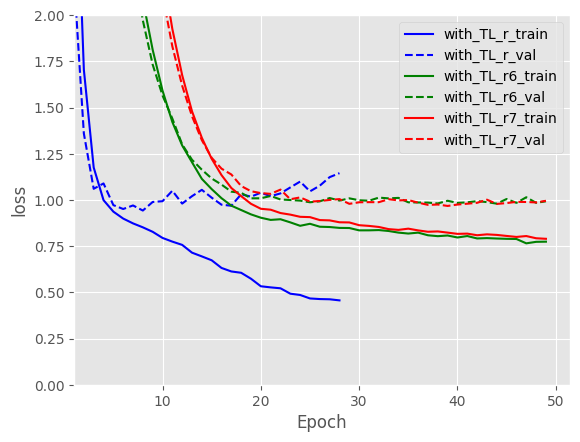

In [188]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

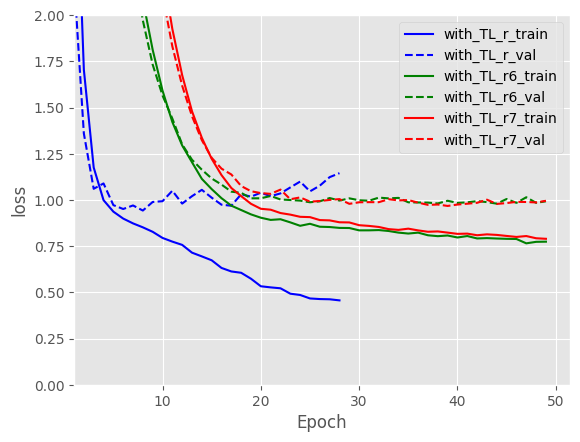

In [189]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

In [190]:
val_metrics = model_glove_r7.evaluate(val_dataset)
metric_names = model_glove_r7.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 44ms/step - loss: 0.9953 - accuracy: 0.5780 - auc: 0.7388 - precision: 0.6250 - recall: 0.5146 - f1_score: 0.5613
loss: 0.9953058362007141
accuracy: 0.578044593334198
auc: 0.7387698888778687
precision: 0.625
recall: 0.5145797729492188
f1_score: 0.5612885355949402


### Conclusion
* The model performed better than the previous model in terms of overfitting
* Further increasing the lambda value

## Model 1.9 Base model regularization lambda =0.5 lr=0.00025

In [191]:
embedding_dim = 100
l2_lambda = 0.5

embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=False)

model_glove_r8 = Sequential()
model_glove_r8.add(embedding_layer_TL)
model_glove_r8.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r8.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_r8.add(GlobalAveragePooling1D())


model_glove_r8.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_glove_r8.add(Dropout(0.3))

model_glove_r8.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]

learning_rate = 0.00025
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_r8.compile(loss='categorical_crossentropy',
                      optimizer=optimizer, metrics=metrics)
model_glove_r8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 25, 100)           621000    
                                                                 
 bidirectional_24 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_25 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
 0 (GlobalAveragePooling1D)                                      
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                     

In [192]:
m_history['with_TL_r8'] = model_glove_r8.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_r8'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 25s 176ms/step - loss: 38.6500 - accuracy: 0.3387 - auc: 0.5033 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.2759 - val_loss: 34.5246 - val_accuracy: 0.2676 - val_auc: 0.5104 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1865
Epoch 2/50
51/51 [==============================] - 10s 196ms/step - loss: 31.0715 - accuracy: 0.3906 - auc: 0.5717 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3737 - val_loss: 27.7245 - val_accuracy: 0.4185 - val_auc: 0.6055 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4054
Epoch 3/50
51/51 [==============================] - 9s 186ms/step - loss: 24.9320 - accuracy: 0.4117 - auc: 0.5918 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3921 - val_loss: 22.2226 - val_accuracy: 0.4305 - val_auc: 0.6134 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4289
Epoch 4/50
51/51 [==============================] 

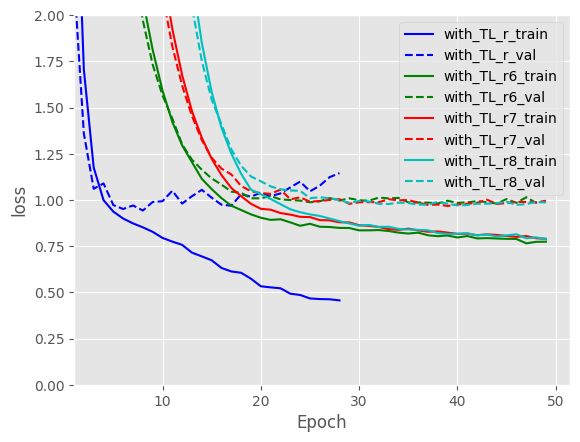

In [193]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

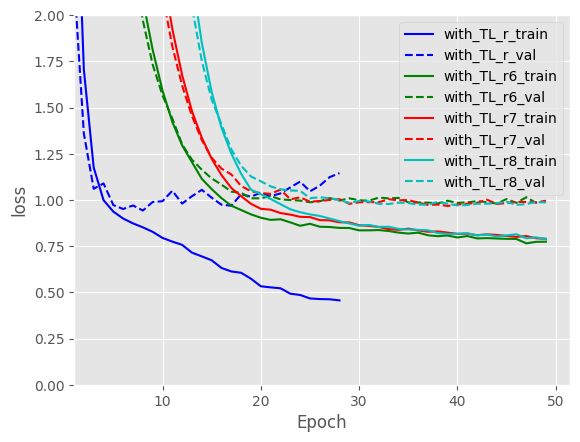

In [194]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

In [195]:
val_metrics = model_glove_r8.evaluate(val_dataset)
metric_names = model_glove_r8.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 27ms/step - loss: 0.9859 - accuracy: 0.5729 - auc: 0.7512 - precision: 0.5945 - recall: 0.5232 - f1_score: 0.5526
loss: 0.9859030842781067
accuracy: 0.572898805141449
auc: 0.7512187957763672
precision: 0.5945419073104858
recall: 0.5231561064720154
f1_score: 0.5526315569877625


### Conclusion
* Model performed worse overall and in terms of overfit and the performance metrics
* Choosing Model 1.8 as the final model

## Fine tuning

Checking if the model improves with fine tuning on the selected model

In [196]:
embedding_dim = 100
l2_lambda = 0.2

embedding_layer_TL = Embedding(len(word_index) + 1,
                               embedding_dim,
                               weights=[embedding_matrix],
                               input_length=max_length,
                               trainable=True)

model_glove_f = Sequential()
model_glove_f.add(embedding_layer_TL)
model_glove_f.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_f.add(Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.25, return_sequences=True)))
model_glove_f.add(GlobalAveragePooling1D())


model_glove_f.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)))
model_glove_f.add(Dropout(0.3))

model_glove_f.add(Dense(3, activation='softmax'))

metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'),F1Score(name='f1_score',average='macro')]

learning_rate = 0.00025
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    learning_rate, decay_steps=1000, decay_rate=1, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_glove_f.compile(loss='categorical_crossentropy',
                      optimizer=optimizer, metrics=metrics)
model_glove_f.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 25, 100)           621000    
                                                                 
 bidirectional_26 (Bidirect  (None, 25, 64)            34048     
 ional)                                                          
                                                                 
 bidirectional_27 (Bidirect  (None, 25, 64)            24832     
 ional)                                                          
                                                                 
 global_average_pooling1d_1  (None, 64)                0         
 1 (GlobalAveragePooling1D)                                      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                     

In [197]:
m_history['with_TL_f'] = model_glove_f.fit(train_dataset, batch_size=32, epochs=50, validation_data=val_dataset,callbacks=get_callbacks('with_TL_f'),class_weight=class_weights_dict,verbose=1)

Epoch 1/50
51/51 [==============================] - 37s 208ms/step - loss: 16.5806 - accuracy: 0.3657 - auc: 0.5411 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.3601 - val_loss: 14.8911 - val_accuracy: 0.4460 - val_auc: 0.6105 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.3827
Epoch 2/50
51/51 [==============================] - 11s 216ms/step - loss: 13.4782 - accuracy: 0.4056 - auc: 0.5908 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.4046 - val_loss: 12.0973 - val_accuracy: 0.4906 - val_auc: 0.6432 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4247
Epoch 3/50
51/51 [==============================] - 9s 168ms/step - loss: 10.9422 - accuracy: 0.4562 - auc: 0.6430 - precision: 0.5000 - recall: 9.1968e-04 - f1_score: 0.4303 - val_loss: 9.8135 - val_accuracy: 0.4923 - val_auc: 0.6449 - val_precision: 1.0000 - val_recall: 0.0137 - val_f1_score: 0.4155
Epoch 4/50
51/51 [==============================] - 9s 183ms/st

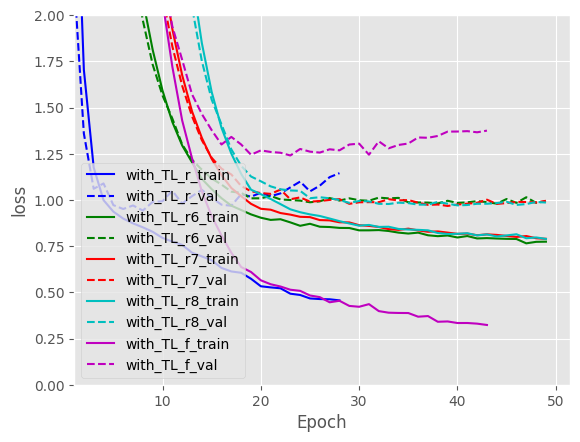

In [198]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'loss')

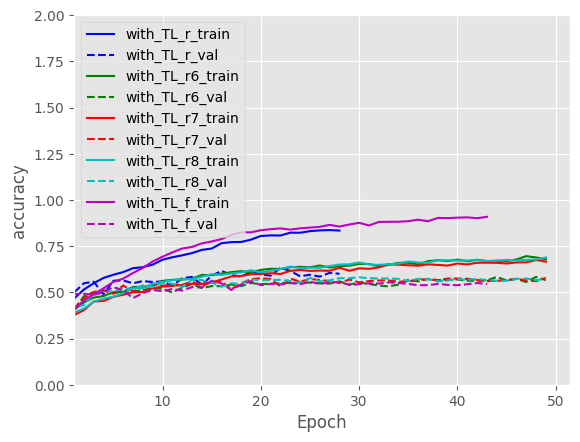

In [199]:
plotter(m_history, ylim=[0.0, 2.0], metric = 'accuracy')

In [200]:
val_metrics = model_glove_f.evaluate(val_dataset)
metric_names = model_glove_f.metrics_names
metric_values = val_metrics

for name, value in zip(metric_names, metric_values):
    print(f"{name}: {value}")

10/10 [==============================] - 0s 22ms/step - loss: 1.3750 - accuracy: 0.5455 - auc: 0.7240 - precision: 0.5534 - recall: 0.5334 - f1_score: 0.5132
loss: 1.3749945163726807
accuracy: 0.5454545617103577
auc: 0.7239716649055481
precision: 0.5533807873725891
recall: 0.5334476828575134
f1_score: 0.5131660103797913


### Conclusion
* fine tuned model is highly overfit selecting Model 1.8 as the final model

#Evaluation on test set

In [201]:
model_glove_r7.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score', average='macro')])


test_evaluation_results = model_glove_r7.evaluate(test_dataset)

print("Test Loss: {:.4f}".format(test_evaluation_results[0]))
print("Test Accuracy: {:.4f}".format(test_evaluation_results[1]))
print("Test AUC: {:.4f}".format(test_evaluation_results[2]))
print("Test Precision: {:.4f}".format(test_evaluation_results[3]))
print("Test Recall: {:.4f}".format(test_evaluation_results[4]))
print("Test F1 Score: {:.4f}".format(test_evaluation_results[5]))

20/20 [==============================] - 3s 23ms/step - loss: 0.9928 - accuracy: 0.5396 - auc: 0.7314 - precision: 0.5636 - recall: 0.4788 - f1_score: 0.5055
Test Loss: 0.9928
Test Accuracy: 0.5396
Test AUC: 0.7314
Test Precision: 0.5636
Test Recall: 0.4788
Test F1 Score: 0.5055


In [202]:
y_pred = model_glove_r.predict(test_dataset)

y_pred_classes = np.argmax(y_pred, axis=1)


20/20 [==============================] - 2s 24ms/step


In [203]:
len(y_pred_classes)

1249

In [204]:
Test_df['Label'].value_counts()

0    715
1    304
2    230
Name: Label, dtype: int64

In [206]:
from sklearn.metrics import confusion_matrix

true_labels = Test_df['Label']

confusion = confusion_matrix(true_labels, y_pred_classes)

print(confusion)

[[371 218 126]
 [ 58 182  64]
 [ 47  64 119]]


In [207]:
class_labels = ['Against','Favor', 'None']

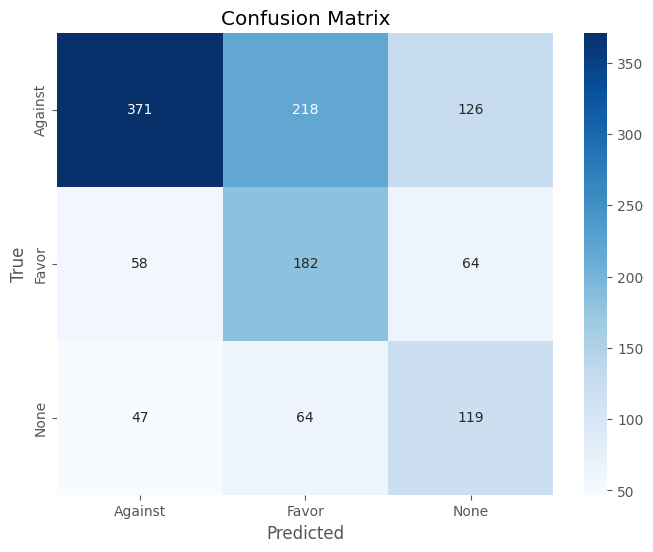

In [208]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Model Performing well for AGAINST stance and worse for NONE stance

#External Real World Data

In [209]:
test_external = pd.read_csv("/content/drive/MyDrive/COSC2779/Assignment2/external_data.csv")

In [210]:
test_external_data = pre_process_data(test_external)

In [211]:
test_external['Label'] = label_encoder.fit_transform(test_external['Stance'])


In [212]:
test_external_labels = to_categorical(test_external['Label'], num_classes=3)

In [213]:
test_external_sequences = tokenizer.texts_to_sequences(test_external_data)

In [214]:
test_external_sequences = pad_sequences(test_external_sequences, maxlen=max_length, padding='post')

In [215]:
test_external_dataset = tf.data.Dataset.from_tensor_slices((test_external_sequences, test_external_labels))
test_external_dataset = test_external_dataset.batch(BATCH_SIZE)

In [216]:
model_glove_r7.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), F1Score(name='f1_score', average='macro')])


test_evaluation_results = model_glove_r7.evaluate(test_external_dataset)

print("Test Loss: {:.4f}".format(test_evaluation_results[0]))
print("Test Accuracy: {:.4f}".format(test_evaluation_results[1]))
print("Test AUC: {:.4f}".format(test_evaluation_results[2]))
print("Test Precision: {:.4f}".format(test_evaluation_results[3]))
print("Test Recall: {:.4f}".format(test_evaluation_results[4]))
print("Test F1 Score: {:.4f}".format(test_evaluation_results[5]))

1/1 [==============================] - 2s 2s/step - loss: 1.0823 - accuracy: 0.5660 - auc: 0.7232 - precision: 0.5625 - recall: 0.5094 - f1_score: 0.4087
Test Loss: 1.0823
Test Accuracy: 0.5660
Test AUC: 0.7232
Test Precision: 0.5625
Test Recall: 0.5094
Test F1 Score: 0.4087


In [217]:
y_pred = model_glove_r7.predict(test_external_dataset)

y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 1s 1s/step


In [218]:
confusion = confusion_matrix(test_external['Label'], y_pred_classes)

print(confusion)

[[18  7  0]
 [ 7 12  0]
 [ 5  4  0]]


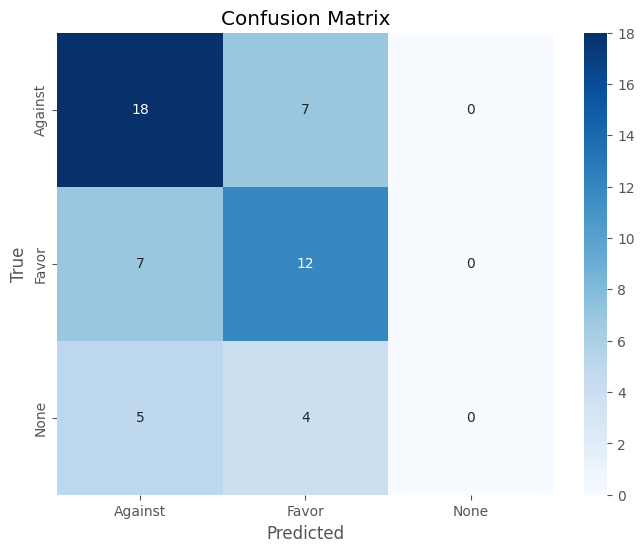

In [219]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model Performing well for AGAINST stance and terribly for NONE stance

## References
[1] R. Nayak, "Hands-on Data Augmentation in NLP using NLPAug Python Library," Codex, Apr 7, 2022. [Online]. Available: https://medium.com/codex/hands-on-data-augmentation-in-nlp-using-nlpaug-python-library-ad323c22908. [Accessed: October 8, 2023].

[2]PyPI (Python Package Index). "BackTranslation." PyPI - The Python Package Index, 2023. [Online]. Available: https://pypi.org/project/BackTranslation/. [Accessed: October 8, 2023].